In [1]:
import face_alignment
from skimage import io
import numpy as np
import cv2
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2

In [2]:

from mpl_toolkits.axes_grid1 import ImageGrid
import sklearn 
import os 
import time 
from tqdm import tqdm
import cv2 
import numpy as np 
import math
import imutils
import json
import matplotlib.pyplot as plt
import glob
import shutil
import random
import pandas as pd
from shutil import copyfile

def imshow(img):
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.show()
    
def imgshow(ax, img):
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
    else:
        ax.imshow(img, cmap='gray')
    
def images_show(images):
    fig = plt.figure(figsize=(15., 15.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    for ax, im in zip(grid, images):
        imgshow(ax, im)
    plt.show()

In [3]:
import cv2
from typing import List, Tuple, Union
import mediapipe as mp
print(mp.__file__)
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

/home/haiduong/anaconda3/envs/my_env/lib/python3.8/site-packages/mediapipe/__init__.py


In [4]:
path_folder = "/home/haiduong/Documents/VIN_BRAIN/Stroke_Recognition/Data_from_server/Data/val/positive"



file_list = []
for file in os.listdir(path_folder):
    file_list.append(path_folder +"/" +  file)


folder_save_output = "/home/haiduong/Documents/VIN_BRAIN/Stroke_Recognition/Data_from_server/Data/test"

In [8]:
def _normalized_to_pixel_coordinates(
    normalized_x: float, normalized_y: float, image_width: int,
    image_height: int) -> Union[None, Tuple[int, int]]:
    def is_valid_normalized_value(value: float) -> bool:
        return (value > 0 or math.isclose(0, value)) and (value < 1 or
                                                      math.isclose(1, value))

    if not (is_valid_normalized_value(normalized_x) and
          is_valid_normalized_value(normalized_y)):
        return None
    
    x_px = min(math.floor(normalized_x * image_width), image_width - 1)
    y_px = min(math.floor(normalized_y * image_height), image_height - 1)
    return x_px, y_px

def get_keypoint(landmark_list, image):
    if not landmark_list:
        return
    if image.shape[2] != 3:
        raise ValueError('Input image must contain three channel rgb data.')
    image_rows, image_cols, _ = image.shape
    idx_to_coordinates = {}
    for idx, landmark in enumerate(landmark_list.landmark):
        if ((landmark.HasField('visibility') and
         landmark.visibility < VISIBILITY_THRESHOLD) or
        (landmark.HasField('presence') and
         landmark.presence < PRESENCE_THRESHOLD)):
            continue
        landmark_px = _normalized_to_pixel_coordinates(landmark.x, landmark.y,
                                                   image_cols, image_rows)
        if landmark_px:
            idx_to_coordinates[idx] = landmark_px
    l_keypoint = []
    for landmark_px in idx_to_coordinates.values():
        l_keypoint.append(landmark_px)
    return l_keypoint

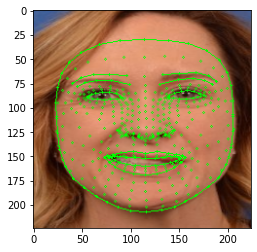

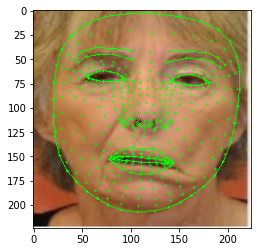

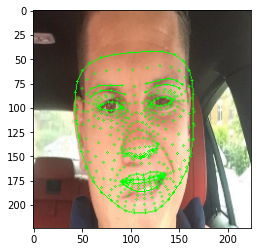

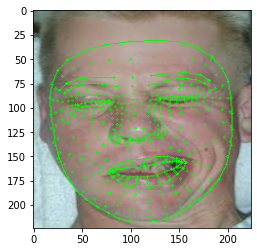

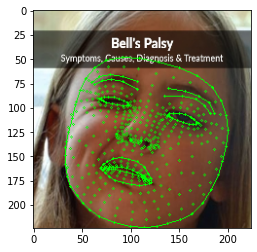

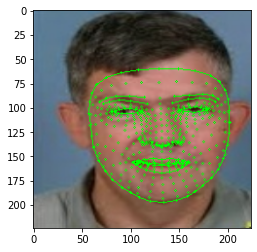

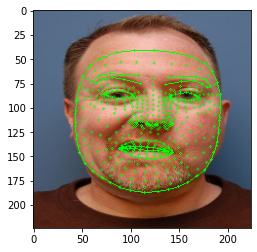

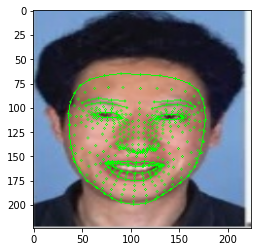

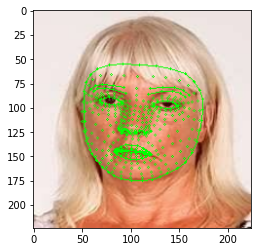

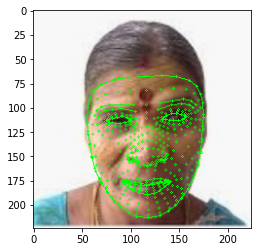

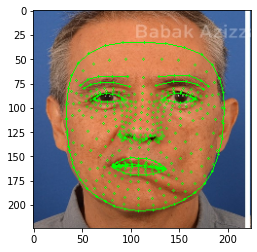

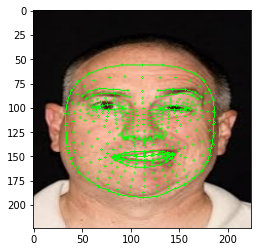

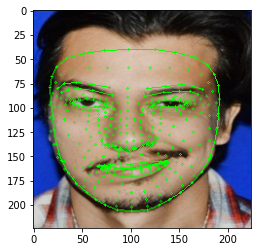

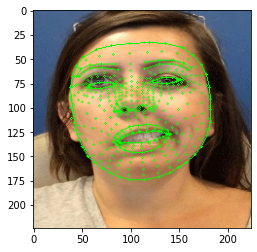

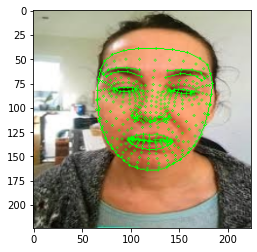

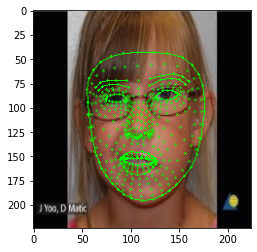

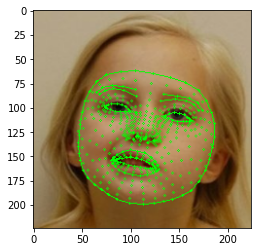

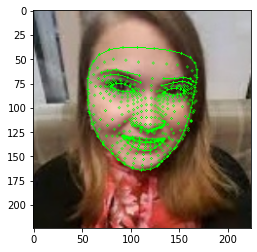

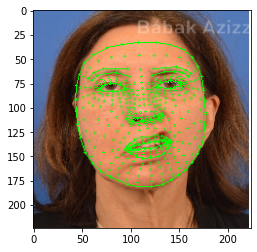

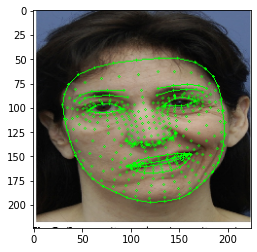

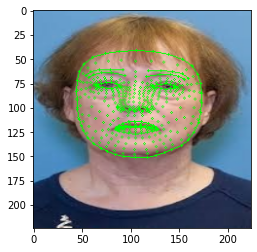

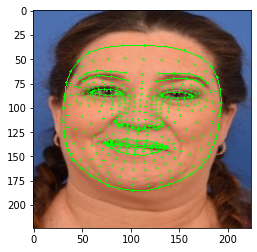

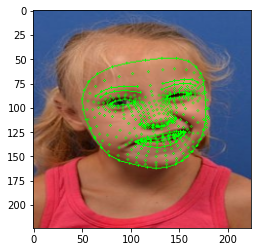

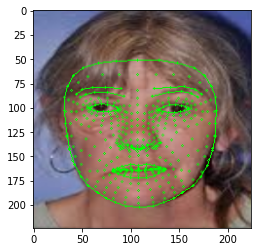

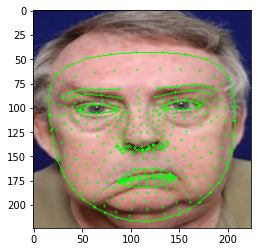

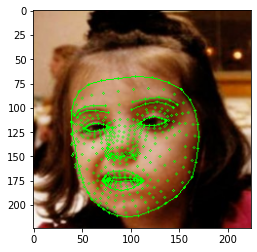

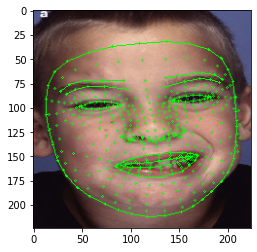

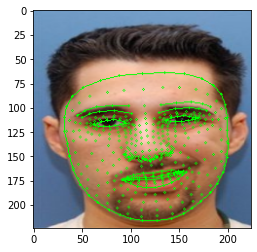

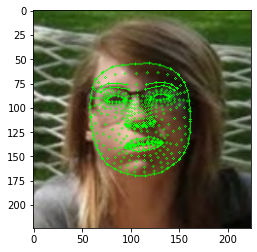

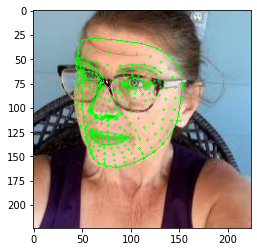

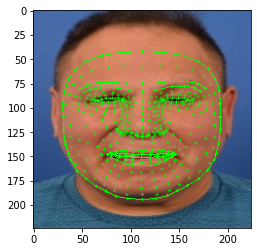

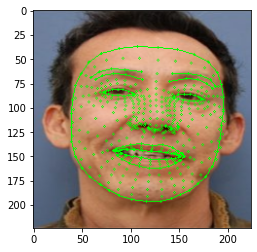

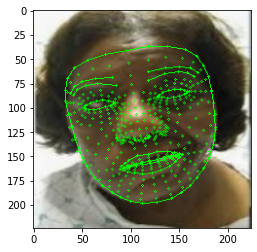

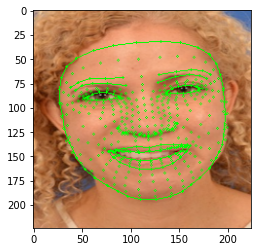

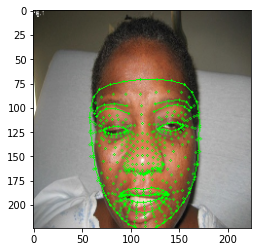

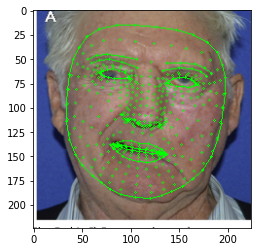

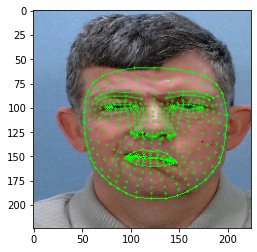

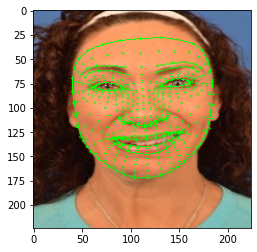

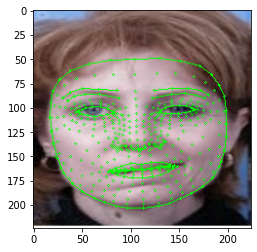

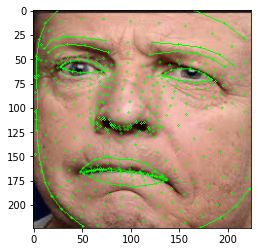

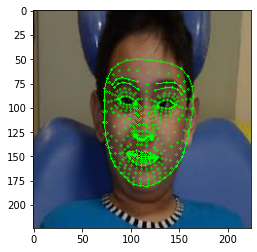

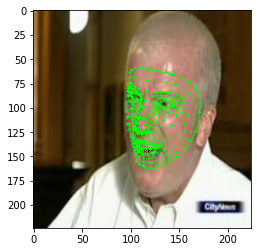

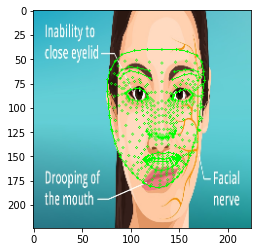

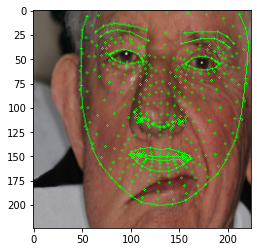

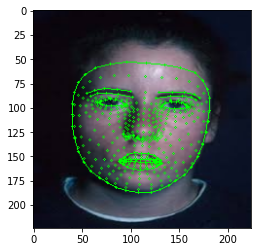

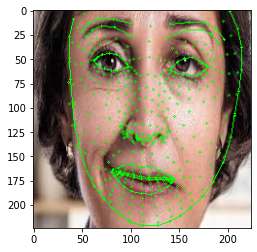

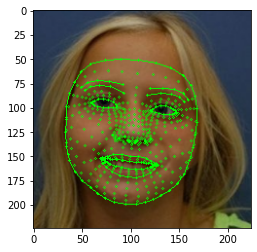

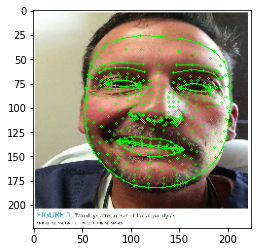

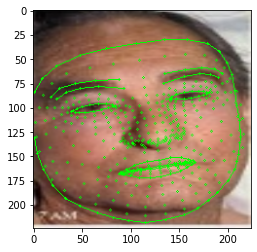

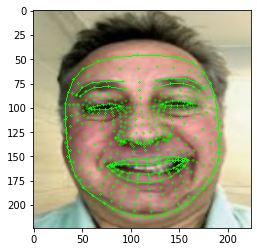

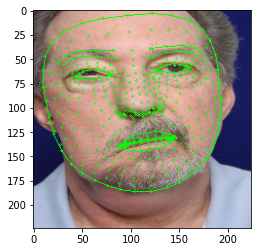

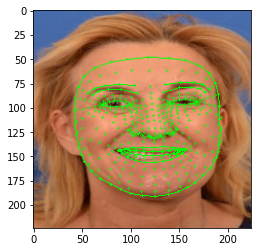

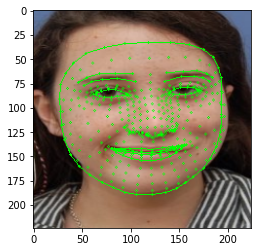

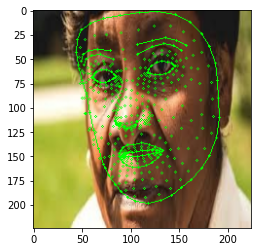

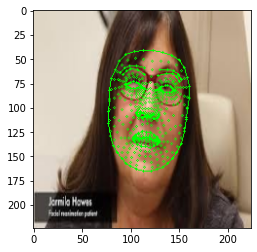

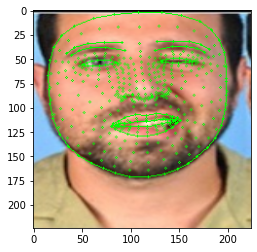

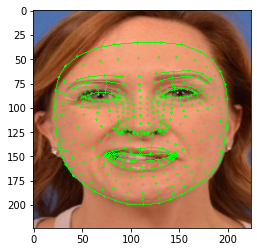

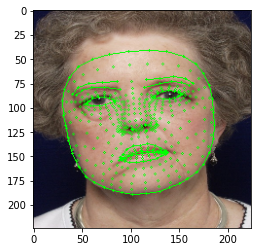

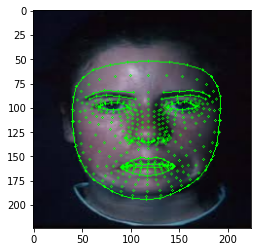

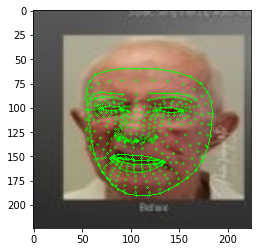

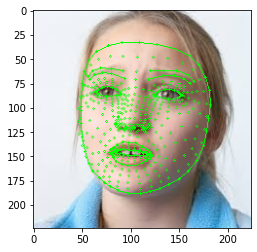

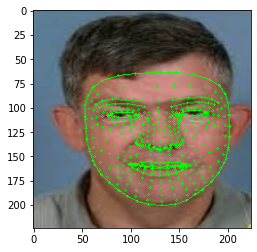

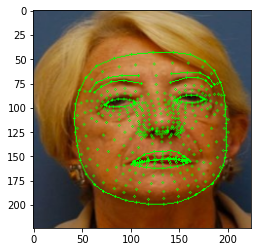

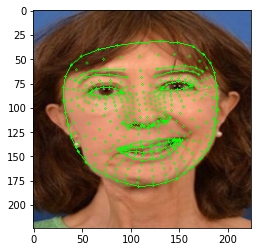

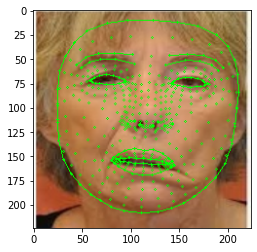

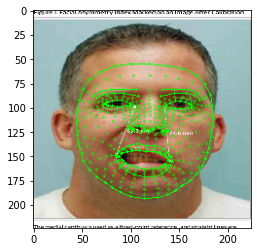

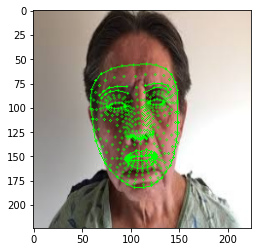

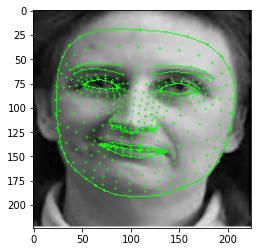

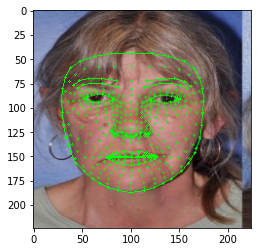

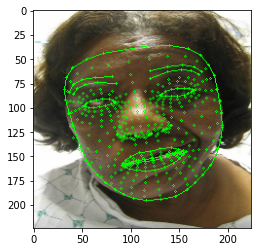

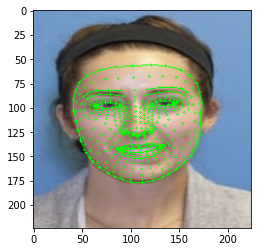

KeyboardInterrupt: 

In [12]:


# For static images:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

    
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5)

for idx, file in enumerate(file_list):
    name_image = file.split("/")[-1]
    image = cv2.imread(file)
    image = cv2.resize(image, (224, 224))
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
        continue
#     annotated_image = np.zeros_like(image, dtype = np.uint8) + 255
    annotated_image = image
    for face_landmarks in results.multi_face_landmarks:
        l_keypoint = get_keypoint(face_landmarks, annotated_image)
#         if (np.shape(l_keypoint)[0] != 468):
#             print("Found", np.shape(l_keypoint))
        mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
        connections=mp_face_mesh.FACE_CONNECTIONS,             
          landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
        imshow(annotated_image)
#         print(rs)
#     cv2.imwrite(folder_save_output + "/" + name_image, annotated_image)


# drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
# cap = cv2.VideoCapture(0)
# with mp_face_mesh.FaceMesh(
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5) as face_mesh:
#   while cap.isOpened():
#     success, image = cap.read()
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use 'break' instead of 'continue'.
#       continue

#     # Flip the image horizontally for a later selfie-view display, and convert
#     # the BGR image to RGB.
#     image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
#     # To improve performance, optionally mark the image as not writeable to
#     # pass by reference.
#     image.flags.writeable = False
#     results = face_mesh.process(image)

#     # Draw the face mesh annotations on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     if results.multi_face_landmarks:
#       for face_landmarks in results.multi_face_landmarks:
#         mp_drawing.draw_landmarks(
#             image=image,
#             landmark_list=face_landmarks,
#             connections=mp_face_mesh.FACE_CONNECTIONS,
#             landmark_drawing_spec=drawing_spec,
#             connection_drawing_spec=drawing_spec)
#     cv2.imshow('MediaPipe FaceMesh', image)
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
# cap.release()

In [28]:
folder_mesh = "/home/haiduong/Documents/VIN_BRAIN/Stroke_Recognition/Method/face-emotion-recognition/output_mesh"
for file in os.listdir(folder_mesh):
    image_mesh = cv2.imread(folder_mesh + "/" + file)
#     imshow(image_mesh)
#     convert_mesh = np.where(image_mesh, image_mesh = [])
    print(image_mesh)
    break


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [11]:
path = "/home/haiduong/Documents/VIN_BRAIN/Stroke_Recognition/Data/train/positive"
des_f = "/home/haiduong/Documents/VIN_BRAIN/Stroke_Recognition/Data/train/log"
l_n_swap_face = []
for file in os.listdir(path):
    if "to" not in file:
        l_n_swap_face.append(file)


In [12]:
print(len(l_n_swap_face))

645


In [13]:
import shutil

In [33]:
# for file in l_n_swap_face:
#     source = path + "/" + file
#     des = des_f + "/" + file
#     shutil.copy(source, des)

In [44]:
# #convert Dataset
path_positive = "/home/haiduong/Documents/VIN_BRAIN/Stroke_Recognition/Data/val/negative"
# #path_save = "/home/haiduong/Documents/VIN_BRAIN/Stroke_Recognition/Data/val_landmark_image/convert_positive"
# Training_60182561.jpg
# l_extend = []
# for file in os.listdir(path_positive):
#     name = file.split("/")[-1]
#     extend = name.split(".")[-1]
#     if extend not in l_extend:
#         l_extend.append(extend)
#     image = cv2.imread(path_positive + "/" + file)
#     imshow(image)
# #     if len(np.shape(image)) < 3:
# #         print(file)
# #     elif np.shape(image)[2] != 3:
# #         print(file)
# #     if len(extend) == 3:
# #         name_save = name[:-3] + "jpg"
# #     elif len(extend) == 4:
# #         name_save = name[:-4] + "jpg"
# #     cv2.imwrite(path_save +"/" + name_save, image)


In [48]:
path = path_positive + "/" + "Training_60182561.jpg"
image = cv2.imread(path)
# image = io.imread(path)
print(type(image))

<class 'numpy.ndarray'>


In [41]:
print(l_extend)

['jpg']
